In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install xgboost lightgbm mlflow optuna

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached mlflow-3.7.0-py3-none-any.whl.metadata (31 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached mlflow_skinny-3.7.0-py3-none-any.whl.metadata (31 kB)
  Using cached mlflow_tracing-3.7.0-py3-none-any.whl.metadata (19 kB)
  Using cached flask-3.1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached alembic-1.17.2-py3-none-any.whl.metadata (7.2 kB)
  Using cached cryptography-46.0.3-cp311-abi3-win_amd64.whl.metadata (5.7 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached huey-2.5.5-py3-none-any.whl.metadata (4.8 kB)
  Using cached pyarrow-22.0.0-cp313-cp313-win_amd64.whl.metadata (3.3 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached click-8.3.1-py3-none-any.whl


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ASSUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# base_folder = "/content/drive/MyDrive/Colab Notebooks/housing_fall2025"
# %cd "{base_folder}"

In [5]:
import sqlite3

conn = sqlite3.connect(DATA_DIR / "housing.db")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

conn.close()


[]


In [7]:
import os
os.getcwd()


'c:\\Users\\ASSUS\\Final_project_MkZia\\housing_app_fall25_Siddy\\notebooks'

In [9]:
import sqlite3
import pandas as pd
from pathlib import Path

BASE_DIR = Path("..")          # project root
DATA_DIR = BASE_DIR / "data"
MODELS_DIR = BASE_DIR / "models"
conn = sqlite3.connect(BASE_DIR / "notebooks" / "housing.db")


housing = pd.read_sql_query(
    """
    SELECT
        b.block_id,
        b.longitude,
        b.latitude,
        s.housing_median_age,
        s.total_rooms,
        s.total_bedrooms,
        s.population,
        s.households,
        s.median_income,
        s.median_house_value,
        op.name AS ocean_proximity
    FROM block AS b
    JOIN block_housing_stats AS s
        ON s.block_id = b.block_id
    JOIN ocean_proximity AS op
        ON op.ocean_proximity_id = b.ocean_proximity_id
    ORDER BY b.block_id
    """,
    conn,
)
conn.close()

housing.head()

block_id  longitude  latitude  housing_median_age  total_rooms  \
0         0    -122.23     37.88                41.0          880   
1         1    -122.22     37.86                21.0         7099   
2         2    -122.24     37.85                52.0         1467   
3         3    -122.25     37.85                52.0         1274   
4         4    -122.25     37.85                52.0         1627   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0         322         126         8.3252            452600.0   
1          1106.0        2401        1138         8.3014            358500.0   
2           190.0         496         177         7.2574            352100.0   
3           235.0         558         219         5.6431            341300.0   
4           280.0         565         259         3.8462            342200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY

In [20]:
!pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable
  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
Using cached ipywidgets-8.1.8-py3-none-any.whl (139 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ASSUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import sys
!{sys.executable} -m pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ASSUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
!pip install ydata-profiling


Defaulting to user installation because normal site-packages is not writeable
  Using cached ydata_profiling-4.18.0-py2.py3-none-any.whl.metadata (22 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached minify_html-0.18.1-cp313-cp313-win_amd64.whl.metadata (18 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached phik-0.12.5-cp313-cp313-win_amd64.whl.metadata (5.6 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached typeguard-4.4.4-py3-none-any.whl.metadata (3.3 kB)
  Using cached ImageHash-4.3.2-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
  Usin


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ASSUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    housing,
    title="Housing Data Profiling Report",
    explorative=True
)

profile


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


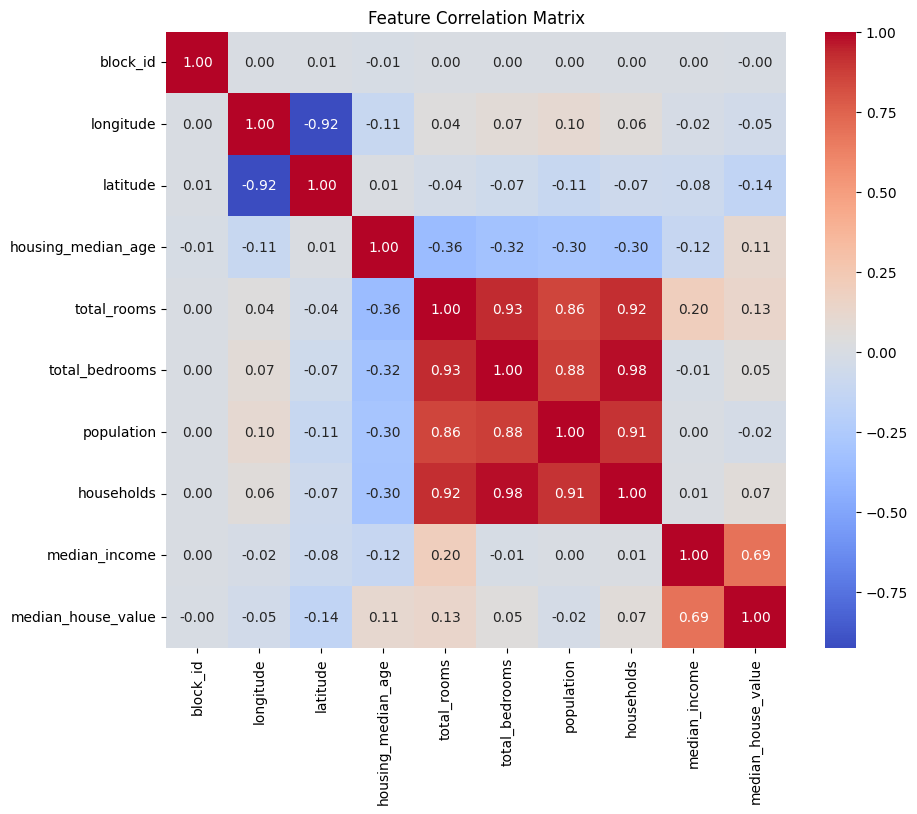

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    housing.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Feature Correlation Matrix")
plt.show()


In [14]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

In [24]:
# =============================================================================
# FULL PIPELINE:
# - Build preprocessing
# - Stratified train/test split
# - Train & log 4 models WITHOUT PCA (Ridge, HGB, XGBoost, LightGBM)
# - Train & log 4 models WITH PCA (preprocessing + PCA(0.95) + model)
# - Pick GLOBAL best among 8 models by Test MAE
# - Save, load, and compare the global best model
# =============================================================================

import os
import numpy as np
import pandas as pd
import time

from dotenv import load_dotenv

from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

import mlflow
from mlflow.models import infer_signature
import joblib

# Import shared components
from housing_pipeline import (
    build_preprocessing,
    make_estimator_for_name,
)

start_time = time.monotonic()

# =============================================================================
# STEP 1: Build Full ML Preprocessing Pipeline
# =============================================================================

preprocessing = build_preprocessing()
print("✓ STEP 1: Preprocessing pipeline created.")


# =============================================================================
# STEP 2: Split Data into Stratified Train and Test Sets
# =============================================================================

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
    labels=[1, 2, 3, 4, 5],
)

train_set, test_set = train_test_split(
    housing,
    test_size=0.20,
    stratify=housing["income_cat"],
    random_state=42,
)

for df in (train_set, test_set):
    df.drop("income_cat", axis=1, inplace=True)

X_train = train_set.drop(["block_id", "median_house_value"], axis=1).copy()
y_train = train_set["median_house_value"].copy()

X_test = test_set.drop(["block_id", "median_house_value"], axis=1).copy()
y_test = test_set["median_house_value"].copy()

print(f"✓ STEP 2: Stratified split done. Train size: {len(X_train)}, Test size: {len(X_test)}")


# =============================================================================
# STEP 3: Define 4 Model Pipelines (WITHOUT PCA)
# =============================================================================

models = {}
for name in ["ridge", "histgradientboosting", "xgboost", "lightgbm"]:
    est = make_estimator_for_name(name)
    models[name] = make_pipeline(preprocessing, est)

print("✓ STEP 3: 4 baseline model pipelines defined.")


# =============================================================================
# STEP 4: Configure MLflow (e.g., Dagshub) via .env
# =============================================================================

load_dotenv(
    dotenv_path="../notebooks/.env",
    override=True
)

MLFLOW_TRACKING_URI = os.getenv("MLFLOW_TRACKING_URI")
MLFLOW_TRACKING_USERNAME = os.getenv("MLFLOW_TRACKING_USERNAME")
MLFLOW_TRACKING_PASSWORD = os.getenv("MLFLOW_TRACKING_PASSWORD")

if MLFLOW_TRACKING_USERNAME:
    os.environ["MLFLOW_TRACKING_USERNAME"] = MLFLOW_TRACKING_USERNAME
if MLFLOW_TRACKING_PASSWORD:
    os.environ["MLFLOW_TRACKING_PASSWORD"] = MLFLOW_TRACKING_PASSWORD

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("median_house_pricing_multi_model")

print("✓ STEP 4: MLflow configured.")


# =============================================================================
# STEP 5: Train, Evaluate, and Log 4 Baseline Models (NO PCA)
# =============================================================================

results = {}

for name, pipeline in models.items():
    print(f"\n{'=' * 80}")
    print(f"Training baseline model: {name}")
    print(f"{'=' * 80}")

    # Compute CV MAE before fitting on full training set
    cv_scores = cross_val_score(
        pipeline, X_train, y_train,
        cv=3, scoring="neg_mean_absolute_error", n_jobs=-1
    )
    cv_mae = -cv_scores.mean()
    print(f"{name} (no PCA) CV MAE: ${cv_mae:,.2f}")

    # Fit on full training set
    pipeline.fit(X_train, y_train)

    # Evaluate on test set
    y_pred = pipeline.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} (no PCA) Test MAE: ${test_mae:,.2f}")

    results[name] = {"pipeline": pipeline, "test_mae": test_mae, "cv_mae": cv_mae}

    with mlflow.start_run(run_name=f"{name}_baseline"):
        mlflow.log_param("model_family", name)
        mlflow.log_param("uses_pca", False)

        est_step_name = list(pipeline.named_steps.keys())[-1]
        est = pipeline.named_steps[est_step_name]
        est_params = {f"{est_step_name}__{k}": v for k, v in est.get_params().items()}
        mlflow.log_params(est_params)

        mlflow.log_metric("cv_MAE", cv_mae)
        mlflow.log_metric("test_MAE", test_mae)

        signature = infer_signature(X_train, pipeline.predict(X_train))
        mlflow.sklearn.log_model(
            sk_model=pipeline,
            artifact_path="housing_model",
            signature=signature,
            input_example=X_train,
            registered_model_name=f"{name}_pipeline",
        )

print("\n✓ STEP 5: All 4 baseline models trained and logged.")


# =============================================================================
# STEP 7: Train, Evaluate, and Log PCA Versions of ALL 4 Models
# =============================================================================

pca_results = {}

for name in models.keys():
    print("\n" + "=" * 80)
    print(f"Training PCA-augmented model: {name}")
    print("=" * 80)

    est = make_estimator_for_name(name)

    pca_pipeline = make_pipeline(
        preprocessing,
        PCA(n_components=0.95),
        est,
    )

    # Compute CV MAE before fitting on full training set
    cv_scores_pca = cross_val_score(
        pca_pipeline, X_train, y_train,
        cv=3, scoring="neg_mean_absolute_error", n_jobs=-1
    )
    cv_mae_pca = -cv_scores_pca.mean()
    print(f"{name}_with_pca CV MAE: ${cv_mae_pca:,.2f}")

    # Fit on full training set
    pca_pipeline.fit(X_train, y_train)

    # Evaluate on test set
    y_pred_pca = pca_pipeline.predict(X_test)
    test_mae_pca = mean_absolute_error(y_test, y_pred_pca)

    model_key = f"{name}_with_pca"
    pca_results[model_key] = {
        "pipeline": pca_pipeline,
        "test_mae": test_mae_pca,
        "cv_mae": cv_mae_pca,
    }

    print(f"{model_key} Test MAE: ${test_mae_pca:,.2f}")

    with mlflow.start_run(run_name=model_key):
        mlflow.log_param("model_family", name)
        mlflow.log_param("uses_pca", True)

        est_step_name = list(pca_pipeline.named_steps.keys())[-1]
        est_step = pca_pipeline.named_steps[est_step_name]
        est_params = {f"{est_step_name}__{k}": v for k, v in est_step.get_params().items()}
        mlflow.log_params(est_params)

        pca_step = pca_pipeline.named_steps["pca"]
        mlflow.log_param("pca__n_components", pca_step.n_components)

        mlflow.log_metric("cv_MAE", cv_mae_pca)
        mlflow.log_metric("test_MAE", test_mae_pca)

        signature_pca = infer_signature(X_train, pca_pipeline.predict(X_train))
        mlflow.sklearn.log_model(
            sk_model=pca_pipeline,
            artifact_path="housing_model_with_pca",
            signature=signature_pca,
            input_example=X_train,
            registered_model_name=f"{name}_pipeline_with_pca",
        )

print("\n✓ STEP 7: All 4 PCA models trained and logged.")


# =============================================================================
# STEP 8: Choose GLOBAL Best Model (with or without PCA)
# =============================================================================

all_results = {}
all_results.update(results)
all_results.update(pca_results)

global_best_name = min(all_results, key=lambda k: all_results[k]["test_mae"])
global_best_mae = all_results[global_best_name]["test_mae"]
global_best_cv_mae = all_results[global_best_name]["cv_mae"]
global_best_pipeline = all_results[global_best_name]["pipeline"]

uses_pca = "with_pca" in global_best_name

print("\n" + "=" * 80)
print("GLOBAL BEST MODEL (ACROSS 8 CANDIDATES)")
print("=" * 80)
print(f"Global best model key: {global_best_name}")
print(f"Global best CV MAE:    ${global_best_cv_mae:,.2f}")
print(f"Global best Test MAE:  ${global_best_mae:,.2f}")
print(f"Uses PCA:               {uses_pca}")


# =============================================================================
# STEP 9: Save, Load, and Compare the GLOBAL Best Model
# =============================================================================

def save_model(model, filename="global_best_model.pkl"):
    joblib.dump(model, filename)
    print(f"✓ Model saved to {filename}")

print("\n" + "-" * 80)
print("Saving and reloading GLOBAL best model...")
print("-" * 80)

save_model(global_best_pipeline, filename=MODELS_DIR / "global_best_model.pkl")

print("\nDone:")
print(f"- GLOBAL best model key: {global_best_name}")
print(f"- GLOBAL best CV MAE:    ${global_best_cv_mae:,.2f}")
print(f"- GLOBAL best Test MAE:  ${global_best_mae:,.2f}")

end_time = time.monotonic()
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60
print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

✓ STEP 1: Preprocessing pipeline created.
✓ STEP 2: Stratified split done. Train size: 16512, Test size: 4128
✓ STEP 3: 4 baseline model pipelines defined.


2025/12/16 02:34:36 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/16 02:34:36 INFO mlflow.store.db.utils: Updating database tables
2025/12/16 02:34:36 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/16 02:34:36 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/16 02:34:36 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2025/12/16 02:34:36 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025/12/16 02:34:36 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025/12/16 02:34:36 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025/12/16 02:34:36 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025/12/16 02:34:36 INFO alembic.runtime.migration: Running 

✓ STEP 4: MLflow configured.

Training baseline model: ridge
ridge (no PCA) CV MAE: $51,151.03
ridge (no PCA) Test MAE: $52,350.18


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/16 02:34:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/16 02:34:54 INFO mlflow.store.db.u


Training baseline model: histgradientboosting
histgradientboosting (no PCA) CV MAE: $30,702.81
histgradientboosting (no PCA) Test MAE: $30,702.41


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/16 02:34:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Successfully registered model 'histgradien


Training baseline model: xgboost
xgboost (no PCA) CV MAE: $28,718.95
xgboost (no PCA) Test MAE: $28,861.05


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/16 02:35:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Successfully registered model 'xgboost_pip


Training baseline model: lightgbm
lightgbm (no PCA) CV MAE: $29,422.96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4651
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 23
[LightGBM] [Info] Start training from score 206333.518653


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


lightgbm (no PCA) Test MAE: $29,684.98


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/16 02:35:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\ASSUS\AppData\Local\Packages\Pyth


✓ STEP 5: All 4 baseline models trained and logged.

Training PCA-augmented model: ridge
ridge_with_pca CV MAE: $56,480.26
ridge_with_pca Test MAE: $56,738.52


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/16 02:35:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Successfully registered model 'ridge_pipel


Training PCA-augmented model: histgradientboosting
histgradientboosting_with_pca CV MAE: $38,567.13
histgradientboosting_with_pca Test MAE: $37,990.38


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/16 02:35:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Successfully registered model 'histgradien


Training PCA-augmented model: xgboost
xgboost_with_pca CV MAE: $37,874.97
xgboost_with_pca Test MAE: $37,678.23


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/16 02:35:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Successfully registered model 'xgboost_pip


Training PCA-augmented model: lightgbm
lightgbm_with_pca CV MAE: $37,690.64
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 9
[LightGBM] [Info] Start training from score 206333.518653


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


lightgbm_with_pca Test MAE: $37,631.80


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/12/16 02:35:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



✓ STEP 7: All 4 PCA models trained and logged.

GLOBAL BEST MODEL (ACROSS 8 CANDIDATES)
Global best model key: xgboost
Global best CV MAE:    $28,718.95
Global best Test MAE:  $28,861.05
Uses PCA:               False

--------------------------------------------------------------------------------
Saving and reloading GLOBAL best model...
--------------------------------------------------------------------------------
✓ Model saved to ..\models\global_best_model.pkl

Done:
- GLOBAL best model key: xgboost
- GLOBAL best CV MAE:    $28,718.95
- GLOBAL best Test MAE:  $28,861.05
Elapsed time: 1 minutes and 15.05 seconds


C:\Users\ASSUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
Successfully registered model 'lightgbm_pipeline_with_pca'.
Created version '1' of model 'lightgbm_pipeline_with_pca'.
